In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


from keras.layers import Dense, LSTM, Flatten

print(tf.__version__)

2.3.0


In [121]:
# Semilla de aleatoriedad del experimento.
tf.random.set_seed(7)

In [122]:
# Carga del dataset.
dataframe = pd.read_csv('pension_media_2021.csv', sep=";", usecols=[1], engine='python')
dataset = dataframe.values
values = dataset.astype('float32')

In [123]:
PASOS=6

# ajuste de la serie para formato de LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [124]:
# formato LSTM
reframed = series_to_supervised(values, PASOS, 1)
reframed.head()

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
6,131.070007,152.089996,170.679993,191.960007,215.429993,233.050003,251.500000
7,152.089996,170.679993,191.960007,215.429993,233.050003,251.500000,273.750000
8,170.679993,191.960007,215.429993,233.050003,251.500000,273.750000,299.679993
9,191.960007,215.429993,233.050003,251.500000,273.750000,299.679993,331.630005
10,215.429993,233.050003,251.500000,273.750000,299.679993,331.630005,357.850006


In [125]:
# separación en datos de test y entrenamiento del modelo
values = reframed.values
n_train_days = 38 - (7+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# separación en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reformulación 3D vectores para LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(25, 1, 6) (25,) (9, 1, 6) (9,)


In [126]:
# Definición del modelo

def crear_modeloFF():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, PASOS)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

In [127]:
# Definición del número de epochs de entrenamiento del modelo.

EPOCHS=200
 
model = crear_modeloFF()

#Entrenamiento del modelo

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 0s 34ms/step - loss: 389007.0938 - val_loss: 1167626.5000
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 358989.2500 - val_loss: 1087235.8750
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 338581.8438 - val_loss: 1022175.3125
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 319722.8125 - val_loss: 959200.0000
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 301093.87

5/5 [==============================] - 0s 4ms/step - loss: 725.9185 - val_loss: 8754.5557
Epoch 74/200
5/5 [==============================] - 0s 4ms/step - loss: 728.2802 - val_loss: 9042.3740
Epoch 75/200
5/5 [==============================] - 0s 4ms/step - loss: 720.7575 - val_loss: 9168.6914
Epoch 76/200
5/5 [==============================] - 0s 4ms/step - loss: 719.3137 - val_loss: 9381.3330
Epoch 77/200
5/5 [==============================] - 0s 4ms/step - loss: 717.5455 - val_loss: 9651.7041
Epoch 78/200
5/5 [==============================] - 0s 4ms/step - loss: 715.5184 - val_loss: 10000.5010
Epoch 79/200
5/5 [==============================] - 0s 4ms/step - loss: 713.3557 - val_loss: 9646.0752
Epoch 80/200
5/5 [==============================] - 0s 3ms/step - loss: 709.3317 - val_loss: 9017.9229
Epoch 81/200
5/5 [==============================] - 0s 4ms/step - loss: 721.7930 - val_loss: 8542.7607
Epoch 82/200
5/5 [==============================] - 0s 4ms/step - loss: 730.7494 - va

Epoch 152/200
5/5 [==============================] - 0s 4ms/step - loss: 693.1165 - val_loss: 9829.2705
Epoch 153/200
5/5 [==============================] - 0s 4ms/step - loss: 691.3452 - val_loss: 9414.2109
Epoch 154/200
5/5 [==============================] - 0s 3ms/step - loss: 701.8987 - val_loss: 8615.7363
Epoch 155/200
5/5 [==============================] - 0s 4ms/step - loss: 703.1490 - val_loss: 8499.5625
Epoch 156/200
5/5 [==============================] - 0s 4ms/step - loss: 707.7859 - val_loss: 8638.4707
Epoch 157/200
5/5 [==============================] - 0s 4ms/step - loss: 697.2593 - val_loss: 9472.2188
Epoch 158/200
5/5 [==============================] - 0s 4ms/step - loss: 690.5683 - val_loss: 10377.7891
Epoch 159/200
5/5 [==============================] - 0s 4ms/step - loss: 697.0486 - val_loss: 10885.6289
Epoch 160/200
5/5 [==============================] - 0s 4ms/step - loss: 702.1735 - val_loss: 11236.7725
Epoch 161/200
5/5 [==============================] - 0s 4ms/s

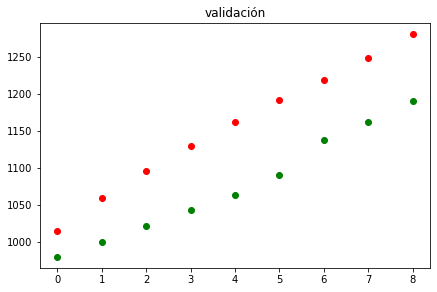

In [140]:
# Comparación de los resultados predichos por el modelo con los resultados reales de la serie.

results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validación')
plt.show()

In [129]:
# Carga de nuevo del dataset.
dataframe_2 = pd.read_csv('pension_media_2021.csv', sep=";", usecols=[1], engine='python')
dataframe_2 = dataframe_2.values
values_2 = dataframe_2.astype('float32')

In [130]:
# Recogida de los ultimos valores.

values_2 = values_2[-40:]


In [131]:
PASOS = 6


reframed_2 = series_to_supervised(values_2, PASOS, 1)
reframed_2.drop(reframed_2.columns[[6]], axis=1, inplace=True) # Quita las columnas que queremos predecir (t).
reframed_2.head(7)

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
6,131.070007,152.089996,170.679993,191.960007,215.429993,233.050003
7,152.089996,170.679993,191.960007,215.429993,233.050003,251.500000
8,170.679993,191.960007,215.429993,233.050003,251.500000,273.750000
9,191.960007,215.429993,233.050003,251.500000,273.750000,299.679993
10,215.429993,233.050003,251.500000,273.750000,299.679993,331.630005
11,233.050003,251.500000,273.750000,299.679993,331.630005,357.850006
12,251.500000,273.750000,299.679993,331.630005,357.850006,385.149994


In [132]:
values = reframed_2.values
x_test = values[33:, :] #Coge la ultima columna que es equivalente a la ultima fila
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[1021.19, 1042.65, 1063.5 , 1090.7 , 1137.81, 1161.8 ]]],
      dtype=float32)

In [133]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(39):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[1021.19 1042.65 1063.5  1090.7  1137.81 1161.8 ]]]
[[[1042.65   1063.5    1090.7    1137.81   1161.8    1280.5414]]]
[[[1063.5    1090.7    1137.81   1161.8    1280.5414 1325.575 ]]]
[[[1090.7    1137.81   1161.8    1280.5414 1325.575  1379.6476]]]
[[[1137.81   1161.8    1280.5414 1325.575  1379.6476 1445.2354]]]
[[[1161.8    1280.5414 1325.575  1379.6476 1445.2354 1512.5183]]]
[[[1280.5414 1325.575  1379.6476 1445.2354 1512.5183 1587.0785]]]
[[[1325.575  1379.6476 1445.2354 1512.5183 1587.0785 1670.3331]]]
[[[1379.6476 1445.2354 1512.5183 1587.0785 1670.3331 1745.5782]]]
[[[1445.2354 1512.5183 1587.0785 1670.3331 1745.5782 1828.1288]]]
[[[1512.5183 1587.0785 1670.3331 1745.5782 1828.1288 1916.267 ]]]
[[[1587.0785 1670.3331 1745.5782 1828.1288 1916.267  2008.1556]]]
[[[1670.3331 1745.5782 1828.1288 1916.267  2008.1556 2105.34  ]]]
[[[1745.5782 1828.1288 1916.267  2008.1556 2105.34   2206.6614]]]
[[[1828.1288 1916.267  2008.1556 2105.34   2206.6614 2311.51  ]]]
[[[1916.267  2008.1556

In [135]:
index = pd.Index(range(40, 79, 1))


prediccion1 = pd.DataFrame(results, index)
prediccion1.columns = ['total']
prediccion1

,total
40,1280.541382
41,1325.574951
42,1379.647583
43,1445.235352
44,1512.518311
45,1587.078491
46,1670.333130
47,1745.578247
48,1828.128784
49,1916.266968


In [136]:
dataframe_3 = pd.read_csv('pension_media_2021.csv', sep=";", usecols=[1], engine='python')
dataframe_3 = dataframe_3.values
values_3 = dataframe_3.astype('float32')
antiguo = pd.DataFrame(values_3)
antiguo.columns = ['total']

In [137]:
frames = [antiguo, prediccion1]

result = pd.concat(frames)

In [138]:
result

result.to_csv('pruebaPensionMedia.csv', mode='a', index=False, header=False)

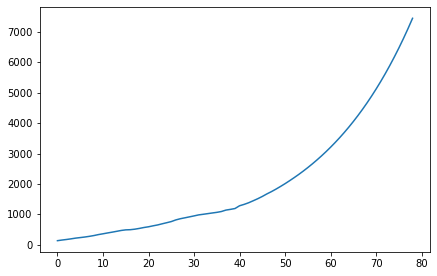

In [139]:
# Se representa conjuntamente los datos obtenidos tras la predicción junto con los datos reales de la serie.


plt.plot(result)
plt.show()